**Import libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold

 **Exploratory Data Analysis**

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Check the shape of the dataset
print("-" * 50)
print("Shape of dataset:", df.shape)

# Check the data types and for missing values
print("-" * 50)
print(df.info())

# Check for any missing values
print("-" * 50)
print("Missing values:\n", df.isnull().sum())
print("-" * 50)

--------------------------------------------------
Shape of dataset: (768, 9)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
--------------------------------------------------
Missing values:
 Pregnancies                 0
Glucose 

In [4]:
# Summary statistics for numerical columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Check class distribution
print(df['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


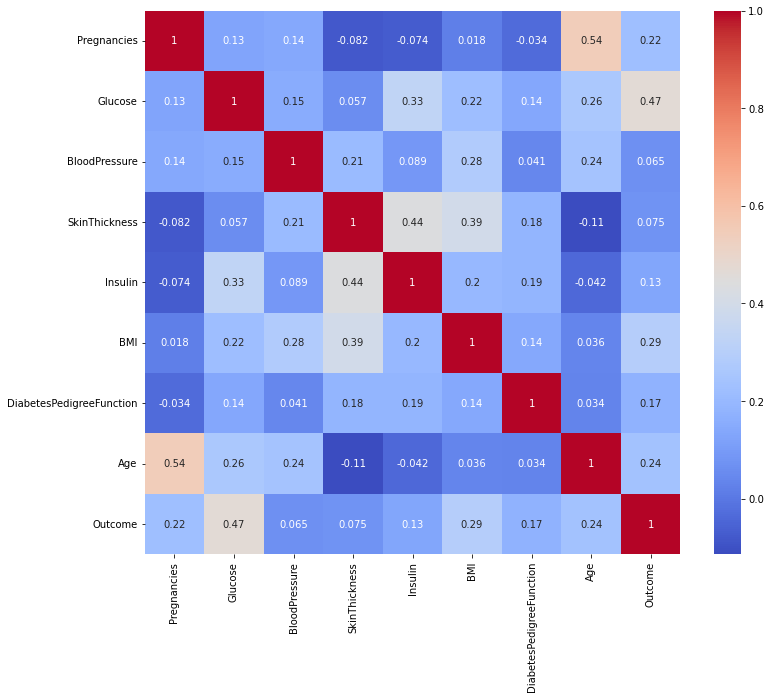

In [6]:
# Plot heatmap to check for correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Data Preprocessing & Feature Engineering**

In [7]:
# removing unimportant features
df = df.drop(columns = ["BloodPressure", "SkinThickness"], axis = 1)

In [8]:
df[df["Insulin"] == 0]

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
5,5,116,0,25.6,0.201,30,0
7,10,115,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...
761,9,170,0,44.0,0.403,43,1
762,9,89,0,22.5,0.142,33,0
764,2,122,0,36.8,0.340,27,0
766,1,126,0,30.1,0.349,47,1


In [9]:
# Replace 0 values in the Insulin column with the median
df['Insulin'].replace(0, df['Insulin'].median(), inplace=True)

In [10]:
df[df["BMI"] == 0]

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,30.5,0.0,0.232,54,1
49,7,105,30.5,0.0,0.305,24,0
60,2,84,30.5,0.0,0.304,21,0
81,2,74,30.5,0.0,0.102,22,0
145,0,102,30.5,0.0,0.572,21,0
371,0,118,89.0,0.0,1.731,21,0
426,0,94,30.5,0.0,0.256,25,0
494,3,80,30.5,0.0,0.174,22,0
522,6,114,30.5,0.0,0.189,26,0
684,5,136,30.5,0.0,0.640,69,0


In [11]:
# Replace 0 values in the BMI column with the median BMI
df['BMI'].replace(0, df['BMI'].median(), inplace=True)

In [12]:
df[df["Glucose"] == 0]

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,30.5,24.7,0.140,22,0
182,1,0,23.0,27.7,0.299,21,0
342,1,0,30.5,32.0,0.389,22,0
349,5,0,30.5,41.0,0.346,37,1
502,6,0,30.5,39.0,0.727,41,1


In [13]:
# Replace 0 values in the Glucose column with the median
df['Glucose'].replace(0, df['Glucose'].median(), inplace=True)

In [14]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
num_cols = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Check the scaled DataFrame
df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.608201,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.608201,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.608201,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.006185,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,0.695378,1.549885,5.484909,-0.020496,1


**Machine Learning**

In [15]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [21]:
# Define classification model
model = LogisticRegression(max_iter=1000)


scores_accuracy = []

# Stratified 5-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    # Split data into training and testing sets
    X_Train, X_Test = X.loc[train_index, :], X.loc[test_index, :]
    y_Train, y_Test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(X_Train, y_Train)
    # Predict on the test set
    y_pred = model.predict(X_Test)

    # Calculate metrics
    scores_accuracy.append(accuracy_score(y_Test, y_pred))

# Print the results
print(f"Logistic Regression Accuracy: {np.mean(scores_accuracy) * 100:.4f}")

Logistic Regression Accuracy: 77.3381


In [25]:
# Calculate the majority class baseline
majority_class = y.value_counts().idxmax()
baseline_pred = [majority_class] * len(y)

# Evaluate the baseline
baseline_accuracy = accuracy_score(y, baseline_pred)

print(f"Baseline Accuracy (majority class): {baseline_accuracy * 100:.4f}")

Baseline Accuracy (majority class): 65.1042
